In [ ]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 13 ms, sys: 965 µs, total: 14 ms
Wall time: 3 s


In [ ]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [ ]:
from dask import delayed


In [ ]:
%%time

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)


CPU times: user 815 µs, sys: 807 µs, total: 1.62 ms
Wall time: 2.34 ms


In [ ]:
z

Delayed('add-64aa3423-75a4-436d-990d-e0c714ac18b1')

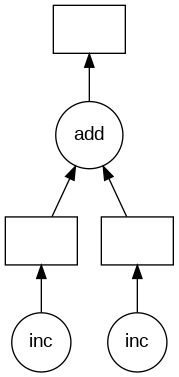

In [ ]:
z.visualize()


In [ ]:
%%time

z.compute()

CPU times: user 13.6 ms, sys: 813 µs, total: 14.4 ms
Wall time: 2 s


5

In [ ]:
data = [1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
%%time

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 48.3 ms, sys: 5.49 ms, total: 53.8 ms
Wall time: 8.01 s


In [ ]:
%%time
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

total.compute()

CPU times: user 31 ms, sys: 2.84 ms, total: 33.9 ms
Wall time: 4.01 s


44

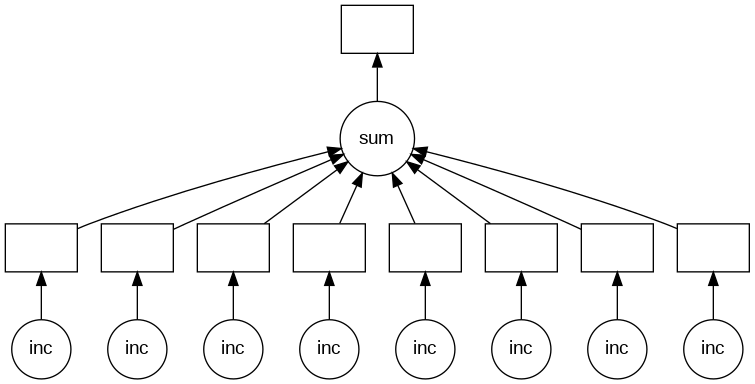

In [ ]:
total.visualize()


In [ ]:
# download the NYC Flights dataset to our workspace
import urllib

print("- Downloading NYC Flights dataset... ", end='', flush=True)
url = "https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz"
filename, headers = urllib.request.urlretrieve(url, 'nycflights.tar.gz')
print("Done!", flush=True)

- Downloading NYC Flights dataset... Done!


In [ ]:
filename


'nycflights.tar.gz'

In [ ]:
import tarfile

# extract the .csv files from the tar file
with tarfile.open(filename, mode='r:gz') as flights:
            flights.extractall('data/')

In [ ]:
import os
import dask.dataframe as dd

df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]})

df


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
df.head()


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [ ]:
%time df.DepDelay.max().compute()


CPU times: user 11.1 s, sys: 273 ms, total: 11.4 s
Wall time: 6.91 s


1435.0

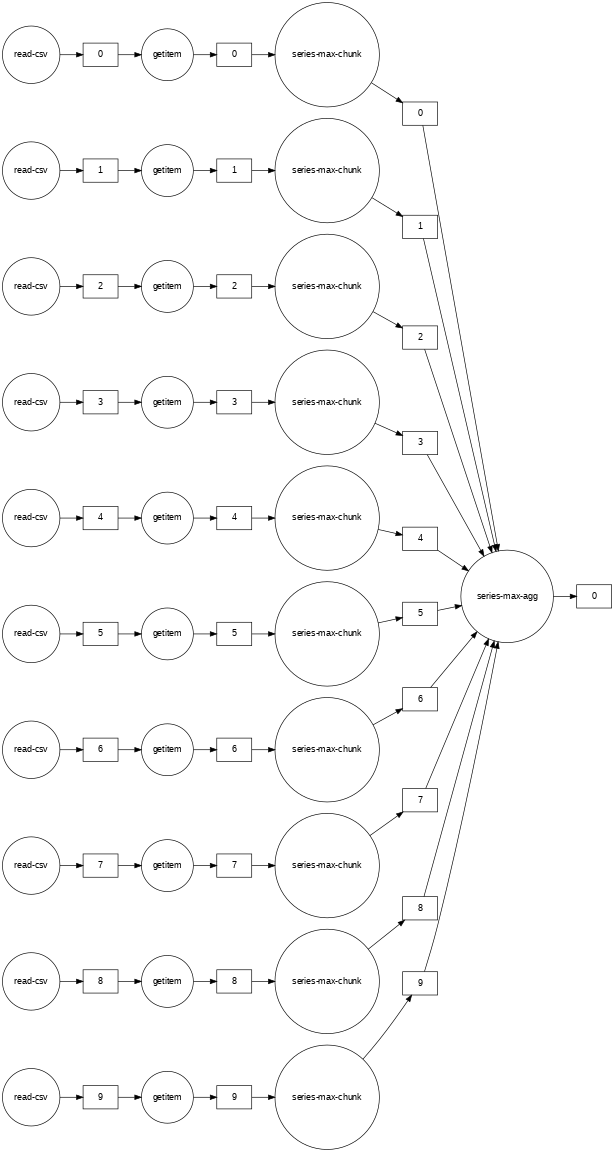

In [ ]:
df.DepDelay.max().visualize(rankdir="LR", size="12, 12!")
